In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import os

In [4]:
import re

In [5]:
import pandas as pd

In [6]:
regex = re.compile(r'\d+')

In [7]:
data_folder=os.path.join('/','Users', 'cdesio','UoB','leakage')

In [8]:
os.listdir(data_folder)

['Slope_vs_T_rad_dam2.png',
 'slopes',
 'Slope_vs_T_rad_dam3.png',
 'extract_pixel_values.py~',
 'Slope_vs_T_rad_dam45.png',
 'Slope_vs_T_rad_dam1.png',
 'Slope_vs_T_rad_dam50.png',
 'Slope_vs_T_rad_dam40.png',
 'Slope_vs_T_rad_dam4.png',
 '.DS_Store',
 'Slope_vs_T_rad_dam5.png',
 'test',
 'leakage_playground.ipynb',
 'Slope_vs_T_rad_dam6.png',
 'Intercept_vs_T_rad_dam_cut_saturation.png',
 'Untitled.ipynb',
 'Slope_vs_T_rad_dam25.png',
 'Slope_vs_T_rad_dam18.png',
 'Slope_vs_T_rad_dam30.png',
 'Slope_vs_T_rad_dam.png',
 'T-5.0',
 'T0.1',
 'T4.9',
 'Slope_vs_T_rad_dam20.png',
 'Slope_vs_T_rad_dam35.png',
 'Slope_vs_T_rad_dam10.png',
 'Slope_vs_T_rad_dam_cut_out_saturation.png',
 'extract_pixel_values.py',
 'Slope_vs_T_rad_dam12.png',
 '.extract_pixel_values.py.swp',
 'Slope_vs_T_rad_dam16.png',
 'T10.0',
 'Leakage_multifiles.ipynb',
 'pedestal_vs_tint_5temp_low_damage',
 'Slope_vs_T_rad_dam14.png',
 'Leakage_extracted_files.ipynb',
 '.ipynb_checkpoints',
 'Intercept_vs_T_rad_dam.png',


In [12]:
T0 = os.path.join(data_folder,'T0.1')

In [13]:
np.sort(os.listdir(T0))

array(['AVG_Tint10169952.tif', 'AVG_Tint10871328.tif',
       'AVG_Tint11572704.tif', 'AVG_Tint13676832.tif',
       'AVG_Tint15780960.tif', 'AVG_Tint1753440.tif',
       'AVG_Tint21391968.tif', 'AVG_Tint2454816.tif',
       'AVG_Tint26301600.tif', 'AVG_Tint31912608.tif',
       'AVG_Tint3857568.tif', 'AVG_Tint5260320.tif',
       'AVG_Tint6663072.tif', 'AVG_Tint7364448.tif',
       'AVG_Tint8767200.tif'], dtype='<U20')

In [14]:
fname = os.path.join(T0, 'AVG_Tint1753440.tif')

In [15]:
im = plt.imread(fname)

In [16]:
im.shape

(2800, 2400)

In [417]:
a0=580
a1=440
a_shift = 402

In [418]:
a = [a0+alpha*a1+beta*a_shift for alpha, beta in zip([0,1,1,1],[0,0,1,2])]


In [419]:
b0=360
b1=420
b_shift = 402

In [420]:
b = [b0+alpha*b1+beta*b_shift for alpha, beta in zip([0,1,1,1,1],[0,0,1,2,3])]

In [421]:
rad_dam = [50, 45, 40, 35, 30, 20, 18, 16, 14, 12, 10, 
           9, 8, 25, 6, 5, 4, 3, 2, 1]

In [422]:
iter_rad_dam = iter(rad_dam)

580 360 50 8538
580 780 45 8012
580 1182 40 7635
580 1584 35 7139
580 1986 30 7151
1020 360 20 5937
1020 780 18 5854
1020 1182 16 5569
1020 1584 14 5397
1020 1986 12 5370
1422 360 10 4487
1422 780 9 4472
1422 1182 8 4189
1422 1584 25 6115
1422 1986 6 4211
1824 360 5 4171
1824 780 4 3987
1824 1182 3 2742
1824 1584 2 3103
1824 1986 1 3143


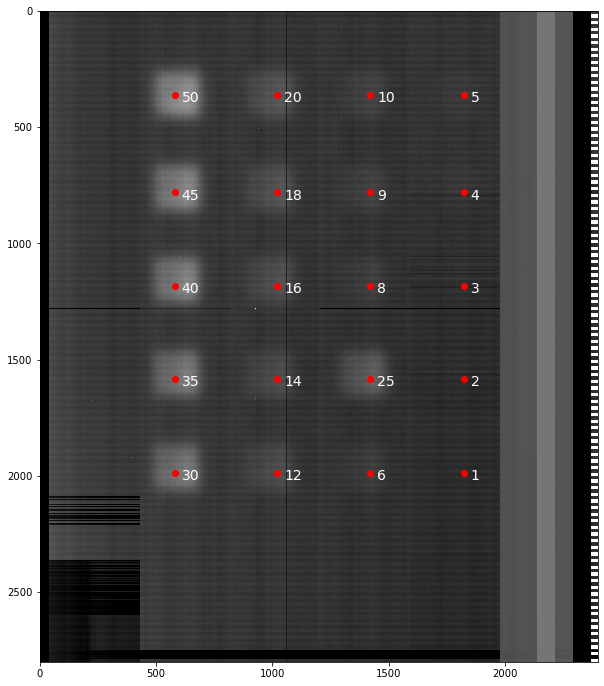

In [448]:
plt.figure(figsize=(10,15))
plt.imshow(im, cmap='gray')
#plt.xlim(0,2400)
#plt.ylim(0, 2800)
iter_rad_dam = iter(rad_dam)
for xa in a:
    for xb in b:
        label=next(iter_rad_dam)
        xs.append(xa)
        ys.append(xb)
        plt.scatter(xa, xb, c='red')
        plt.text(xa+30, xb+30,label , color='w', size=14)
        print(xa, xb, label, im[xb, xa])


In [449]:
def rad_dam_tint(folder):
    int_times = []
    fnames_list = os.listdir(folder)
    for fname in fnames_list:
        if fname.endswith('tif'):
            tint = regex.findall(fname)[0]
            int_times.append(int(tint))
    sorted_fnames_list = np.array(fnames_list)[np.argsort(int_times)]
    a0=580
    a1=440
    a_shift = 400
    a = [a0+alpha*a1+beta*a_shift for alpha, beta in zip([0,1,1,1],[0,0,1,2])]
    b0=360
    b1=420
    b_shift = 400
    b = [b0+alpha*b1+beta*b_shift for alpha, beta in zip([0,1,1,1,1],[0,0,1,2,3])]
    count_points = []
    
    for f, t in zip(sorted_fnames_list, np.sort(int_times)):
        im = plt.imread(os.path.join(folder, f))
        print(f)
        iter_rad_dam = iter(rad_dam)
        for xa in a:
            for yb in b:
                point = (xa, yb)
                count_points.append((next(iter_rad_dam), point, im[yb, xa], t))
    df = pd.DataFrame(count_points, columns=['pt_n','point','count', 'tint'])
    return df

In [450]:
df = rad_dam_tint(T0)

AVG_Tint1753440.tif
AVG_Tint2454816.tif
AVG_Tint3857568.tif
AVG_Tint5260320.tif
AVG_Tint6663072.tif
AVG_Tint7364448.tif
AVG_Tint8767200.tif
AVG_Tint10169952.tif
AVG_Tint10871328.tif
AVG_Tint11572704.tif
AVG_Tint13676832.tif
AVG_Tint15780960.tif
AVG_Tint21391968.tif
AVG_Tint26301600.tif
AVG_Tint31912608.tif


In [451]:
import matplotlib.cm as cm

In [476]:
def plot_alltogether(df, rad_dam_list):
    colors=iter(cm.jet(np.linspace(0, 1,len(rad_dam_list))))
    plt.figure(figsize=(15,10))
    iter_rad_dam = iter(np.sort(rad_dam_list))
    for point in iter_rad_dam:
        plt.plot(np.array(df[df['pt_n']==point]['tint']), np.array(df[df['pt_n']==point]['count']), '-o',
                label='rad_dam {} kGy'.format(point), color=next(colors))
        plt.xlabel('integration time', fontsize=14)
        plt.ylabel('pedistal', fontsize=14)
        plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))

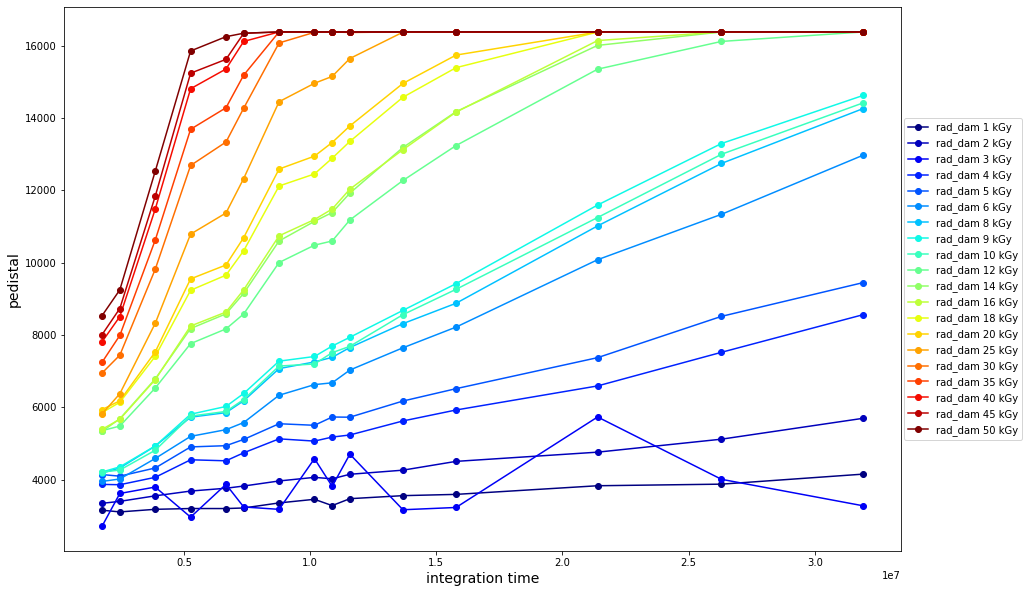

In [477]:
plot_alltogether(df, rad_dam)

In [478]:
from sklearn.linear_model import LinearRegression

In [479]:
def plot_separately(df, rad_dam_list):
    iter_rad_dam = iter(np.sort(rad_dam_list))
    for point in iter_rad_dam:
        plt.figure(figsize=(10,8))
        x = np.array(df[df['pt_n']==point]['tint'])
        y = np.array(df[df['pt_n']==point]['count'])

        #plt.scatter(x, y, label='rad_dam point {}'.format(point))#, color=next(colors))
        coef = np.polyfit(x,y,1)
        poly1d_fn = np.poly1d(coef) 
    # poly1d_fn is now a function which takes in x and returns an estimate for y

        plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k', label='rad_dam {} kGy'.format(point))
        print('{:+.5f}'.format(coef[0]))
        plt.xlabel('integration time')
        plt.ylabel('pedistal')
        plt.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))
        plt.show()

+0.00003


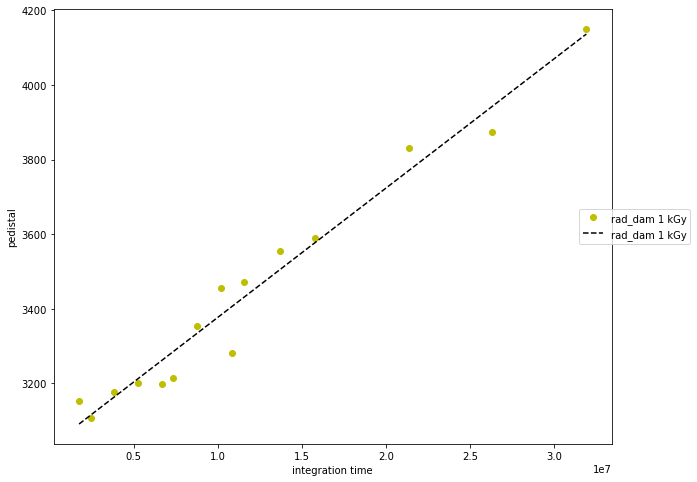

+0.00007


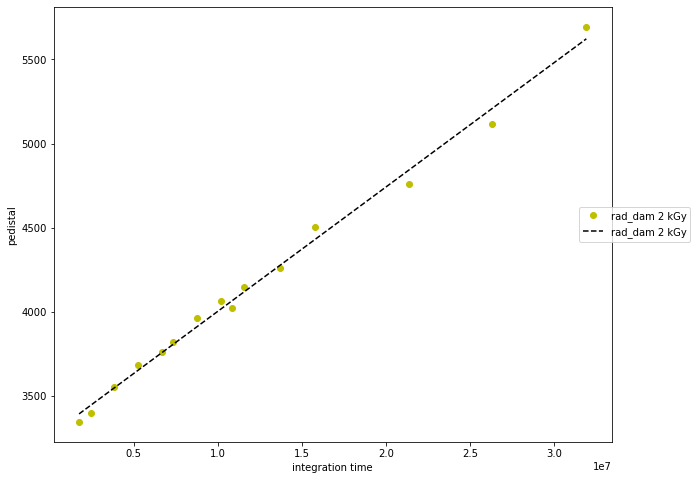

+0.00003


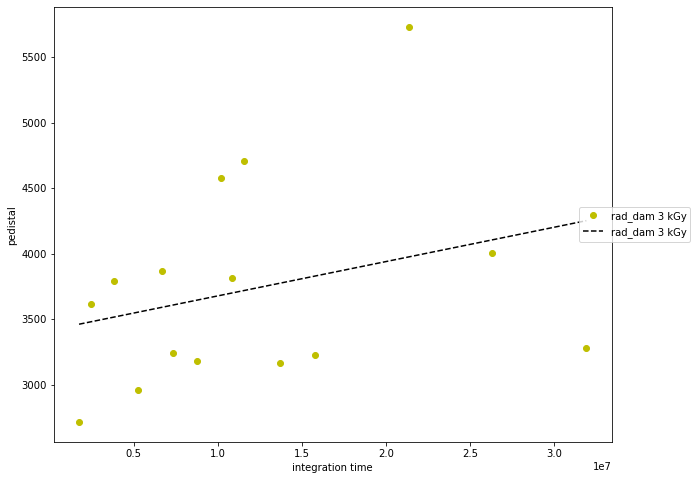

+0.00015


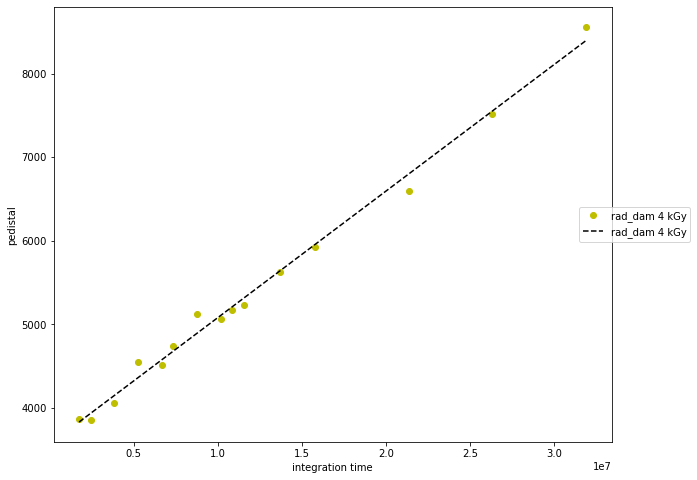

+0.00018


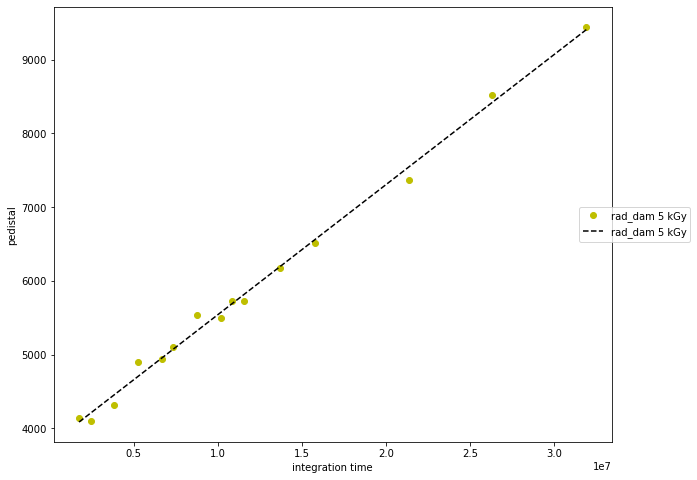

+0.00030


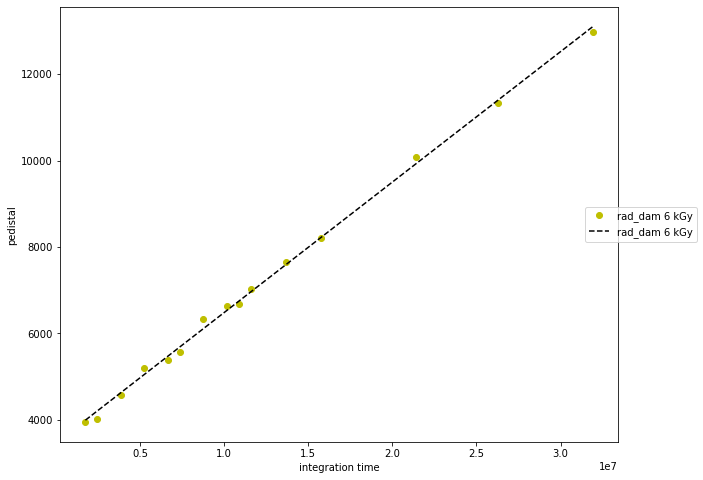

+0.00034


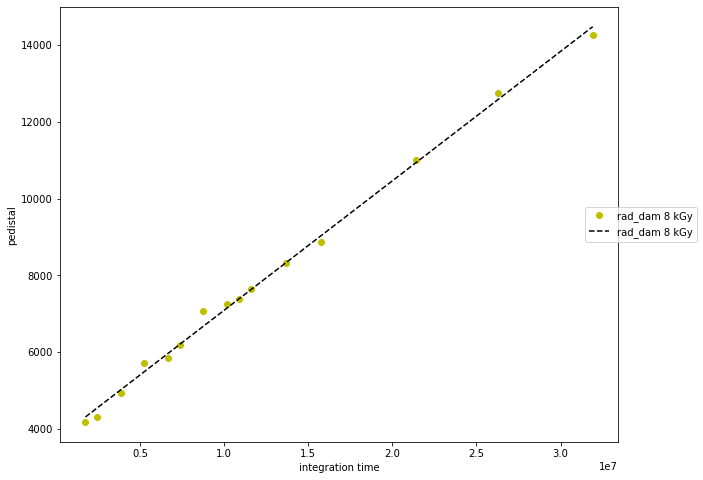

+0.00036


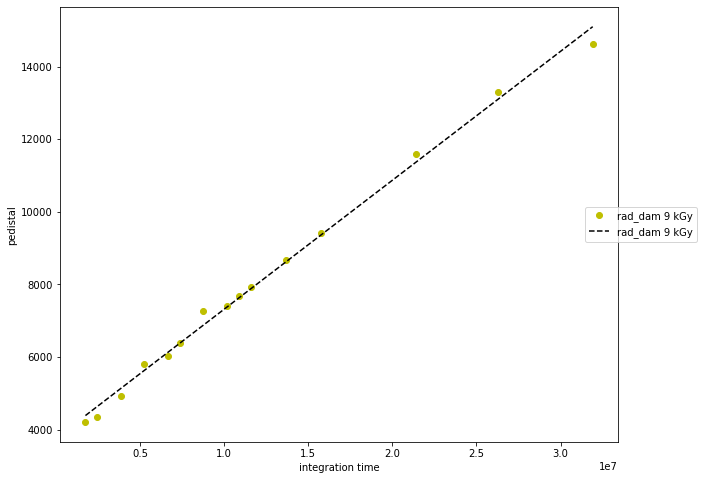

+0.00035


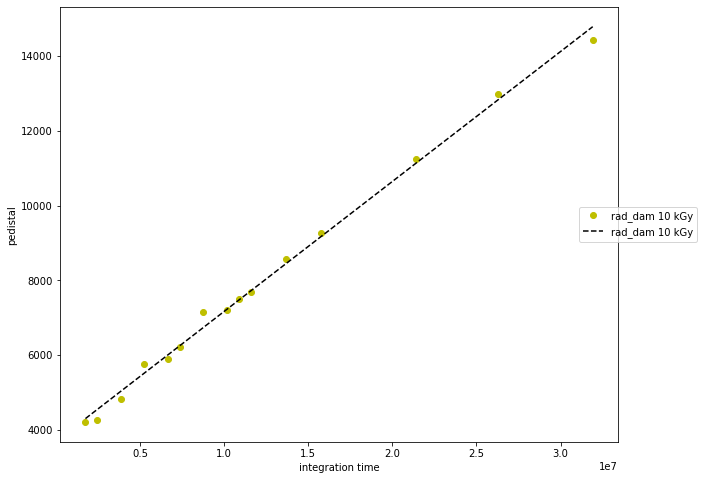

+0.00040


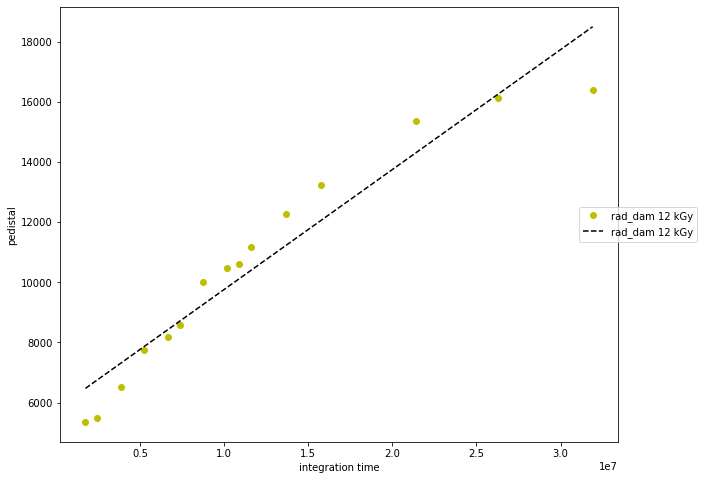

+0.00040


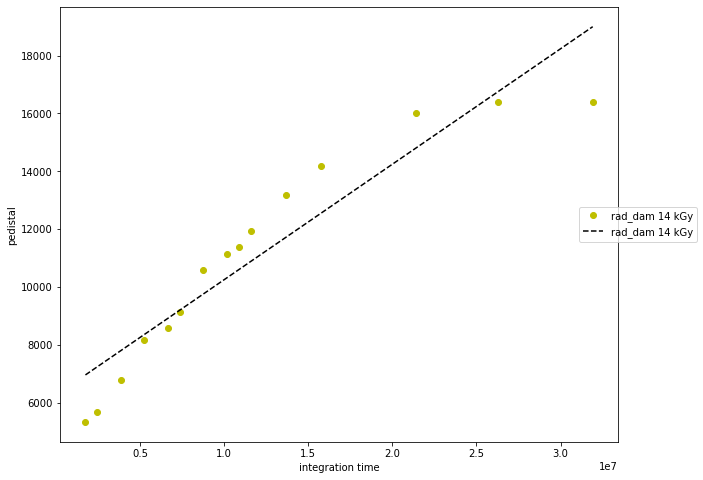

+0.00040


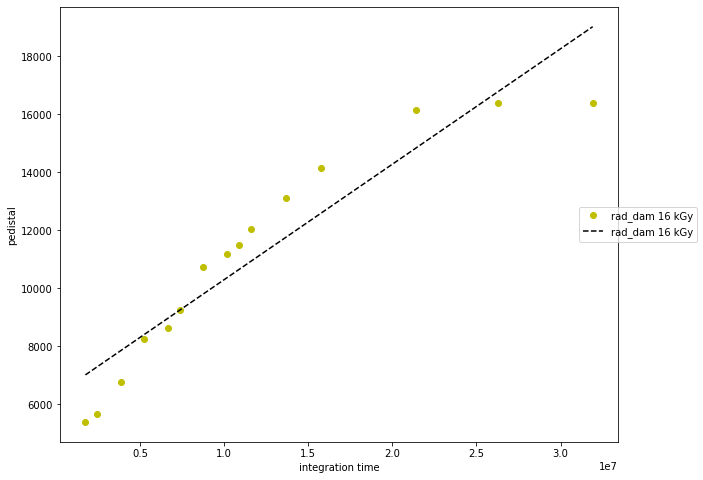

+0.00037


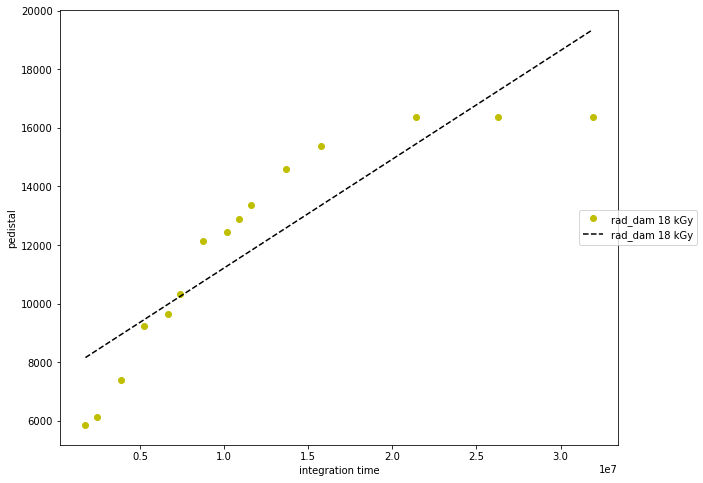

+0.00036


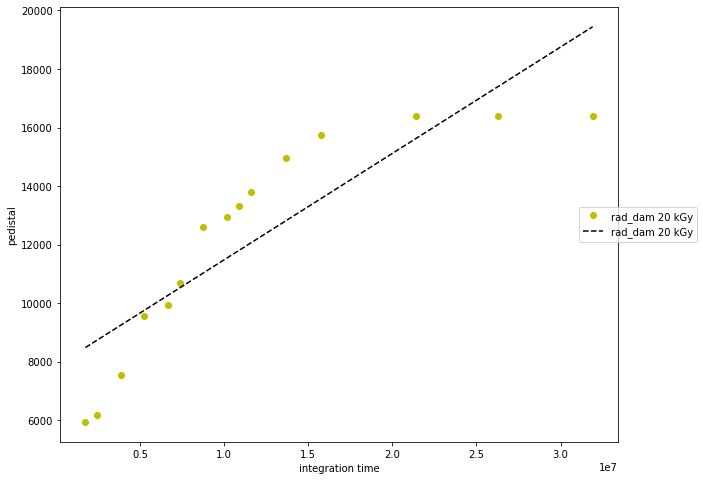

+0.00033


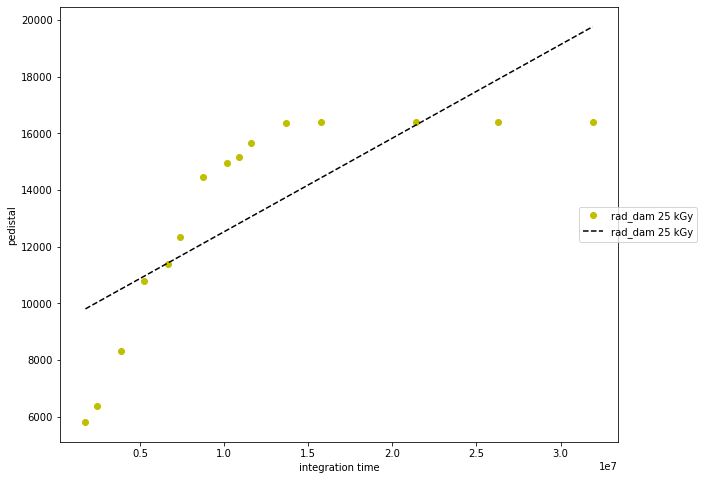

+0.00026


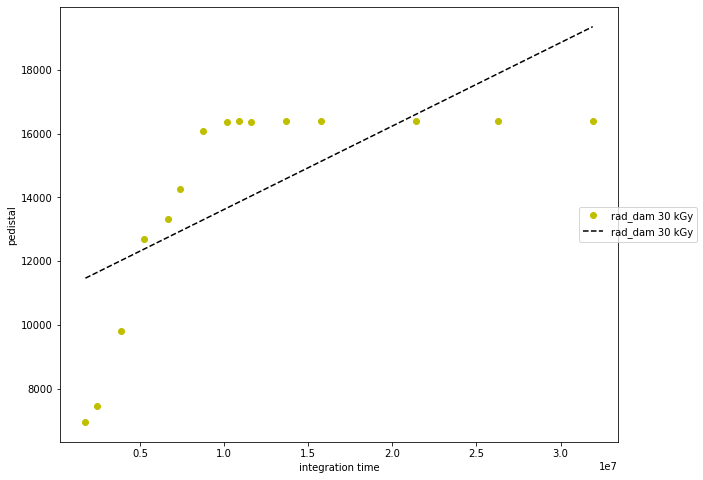

+0.00023


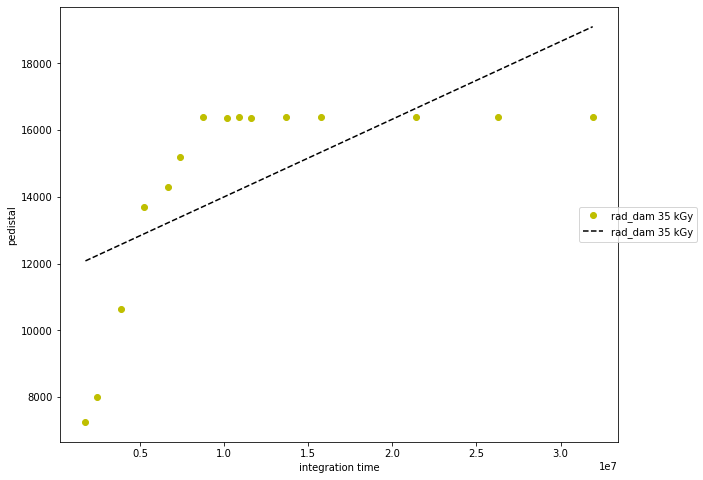

+0.00020


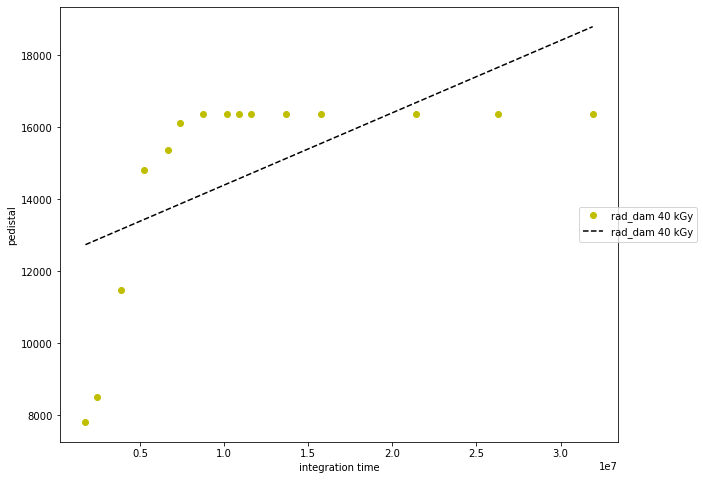

+0.00019


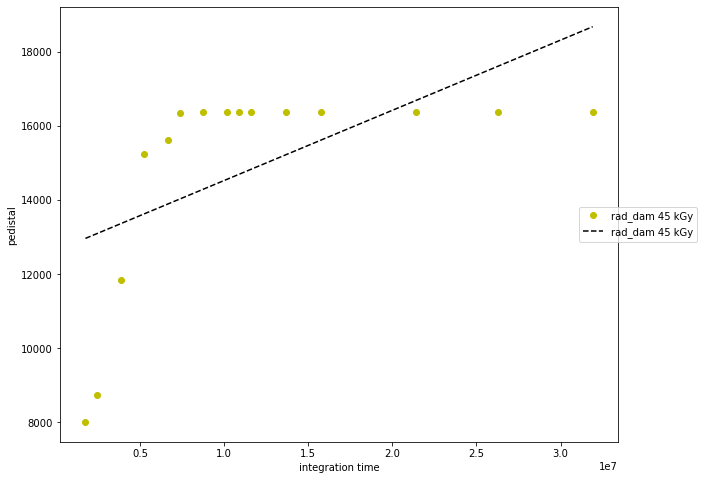

+0.00017


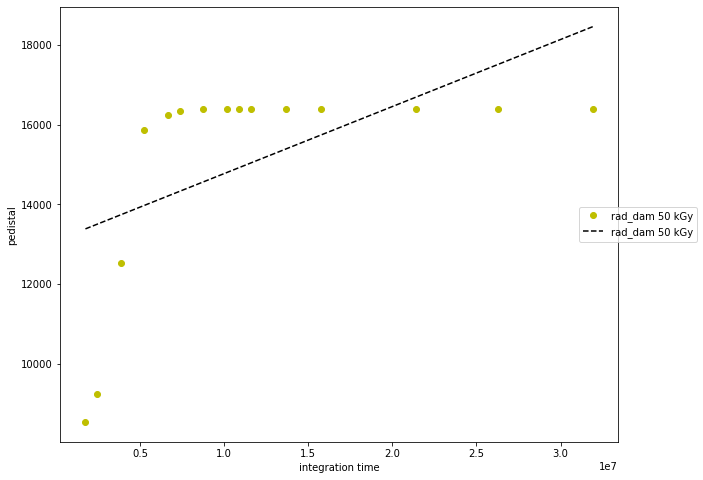

In [480]:
plot_separately(df, rad_dam)

In [467]:
T4_9 = os.path.join(data_folder,'T4.9')

In [468]:
df4_9 = rad_dam_tint(T4_9)

AVG_Tint1753440.tif
AVG_Tint2454816.tif
AVG_Tint3857568.tif
AVG_Tint5260320.tif
AVG_Tint6663072.tif
AVG_Tint7364448.tif
AVG_Tint8767200.tif
AVG_Tint10169952.tif
AVG_Tint10871328.tif
AVG_Tint11572704.tif
AVG_Tint13676832.tif
AVG_Tint15780960.tif
AVG_Tint21391968.tif


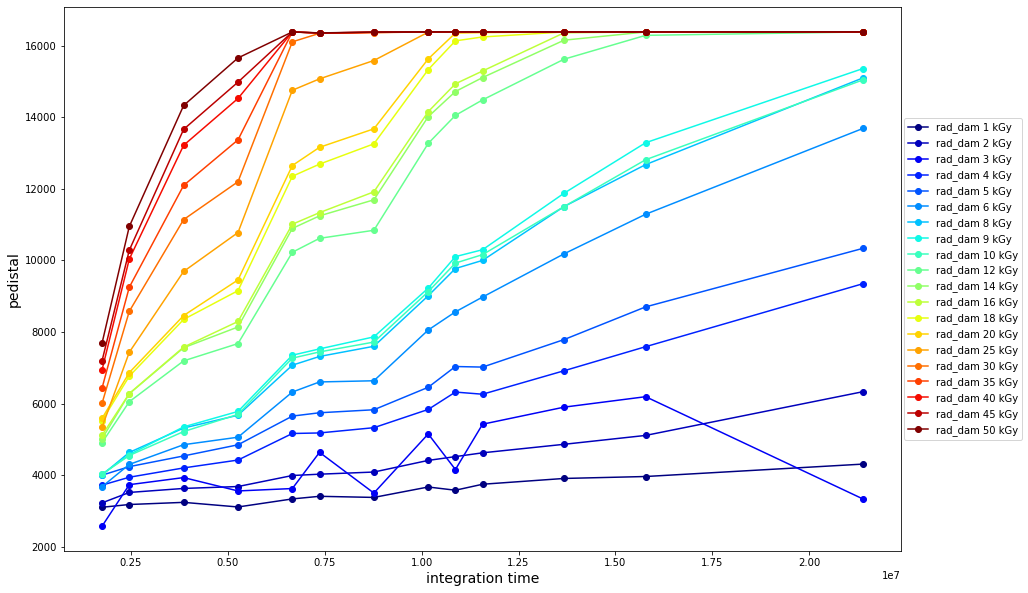

In [481]:
plot_alltogether(df4_9, rad_dam)

+0.00031


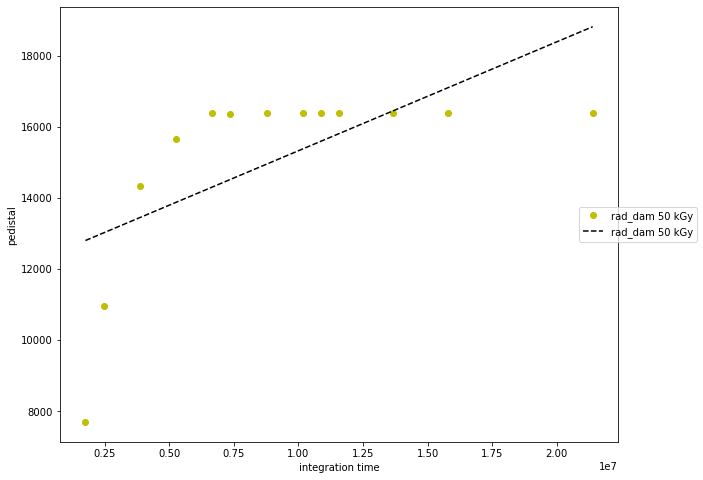

+0.00034


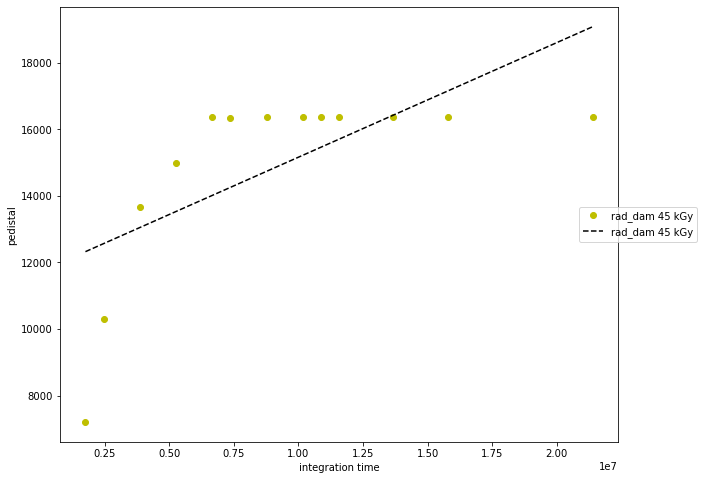

+0.00036


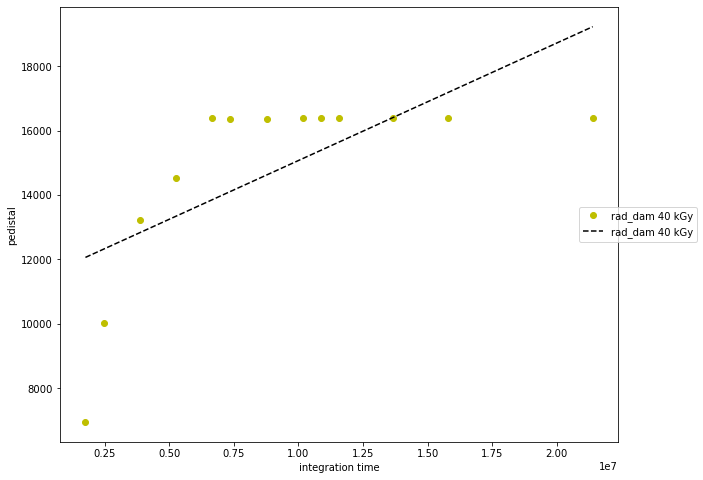

+0.00042


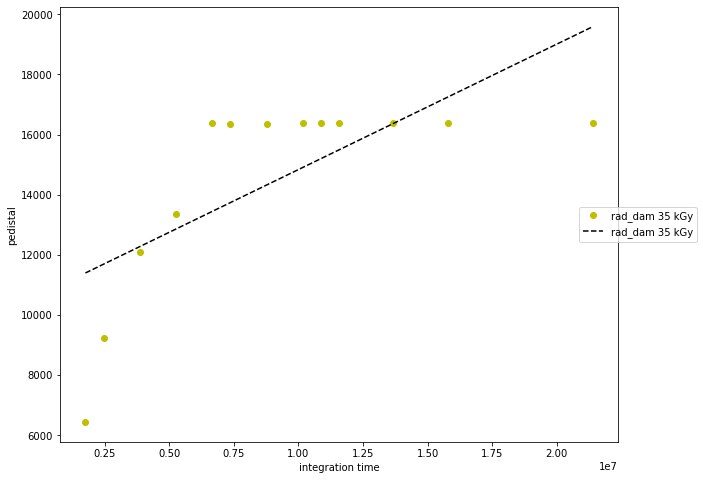

+0.00047


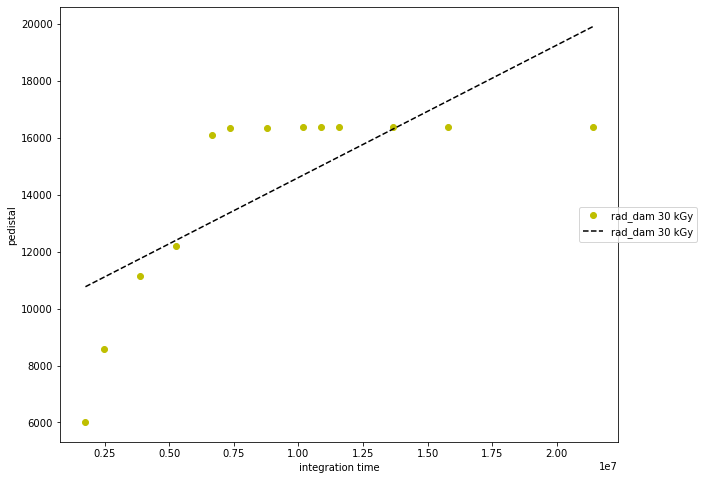

+0.00061


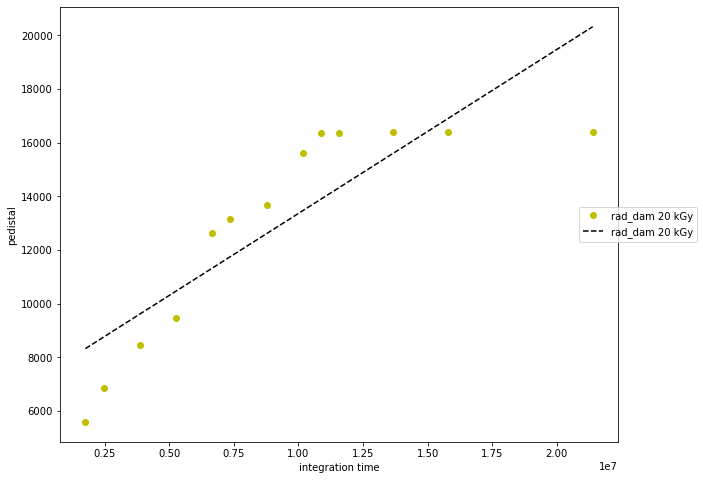

+0.00062


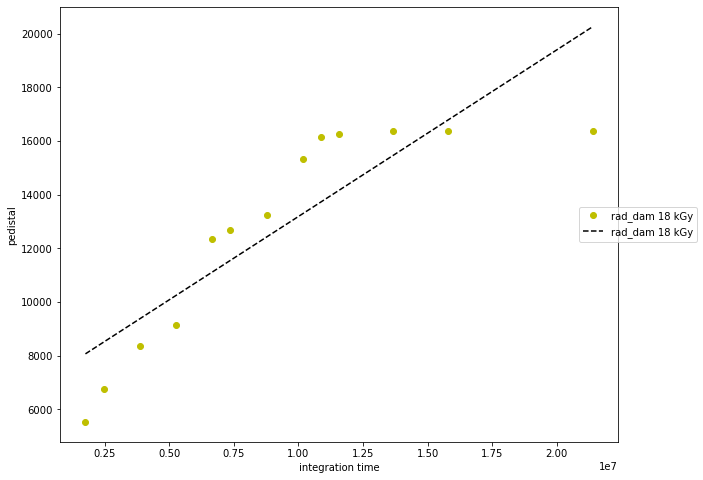

+0.00066


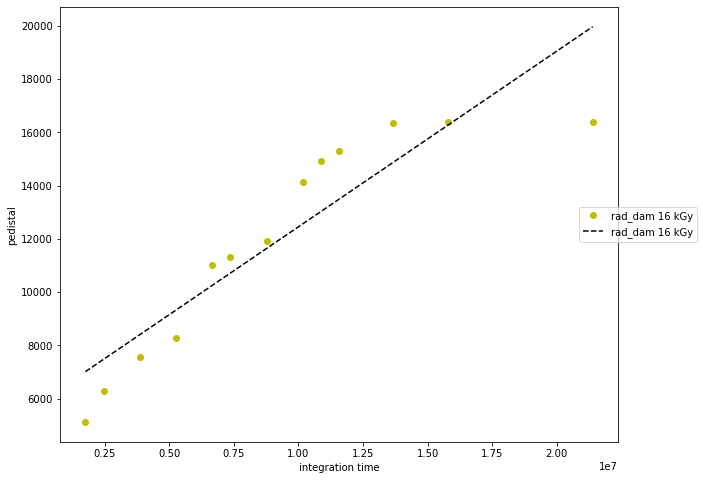

+0.00066


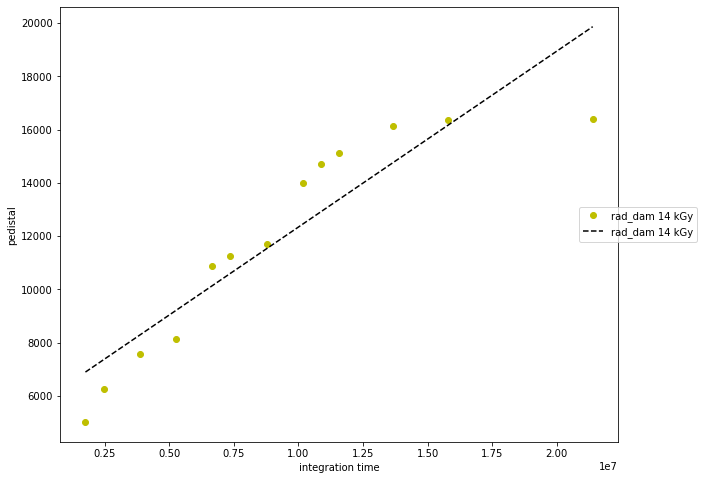

+0.00067


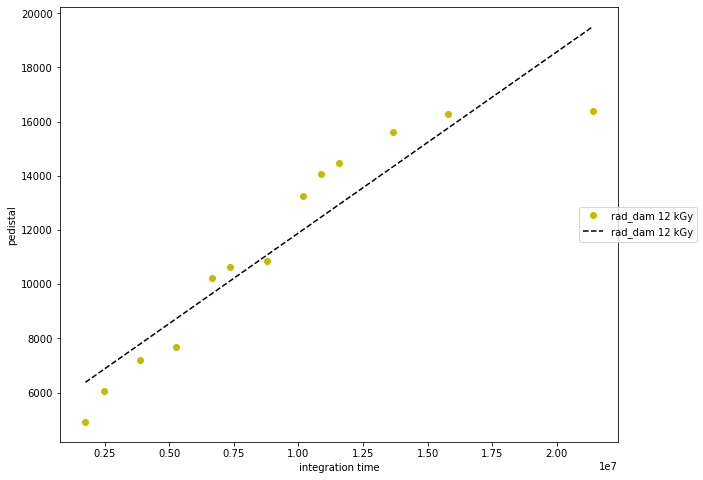

+0.00059


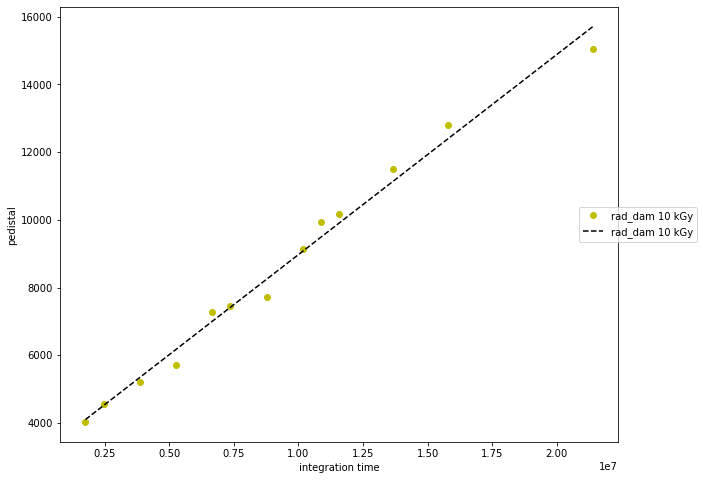

+0.00061


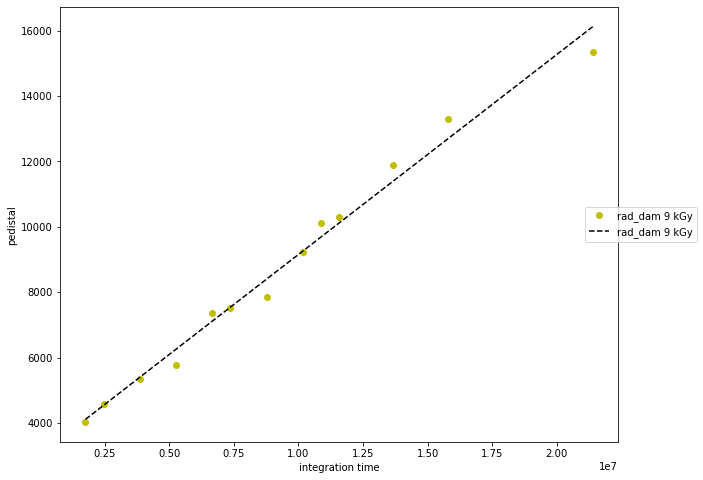

+0.00059


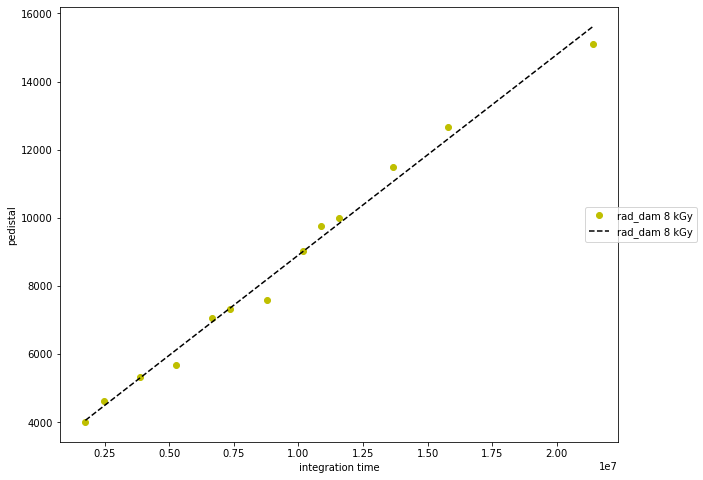

+0.00055


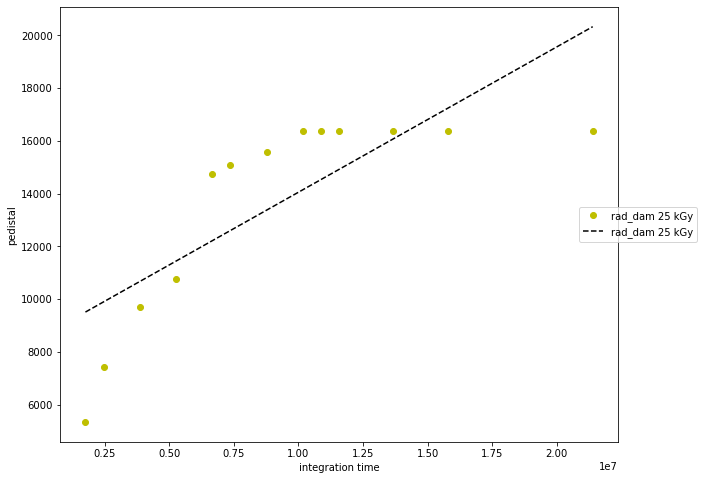

+0.00052


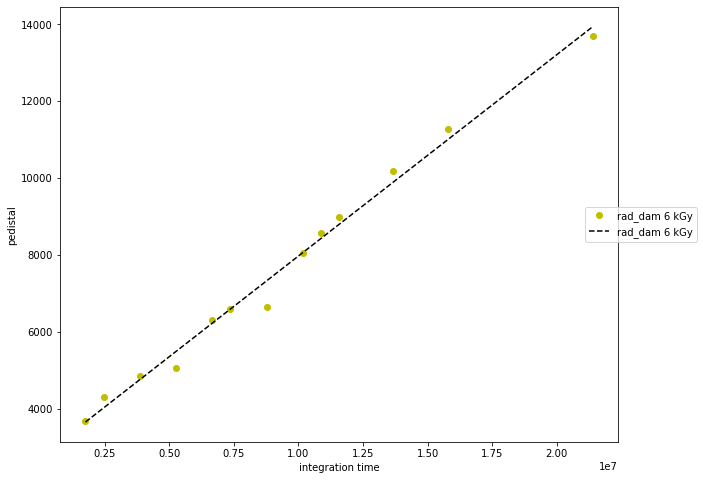

+0.00033


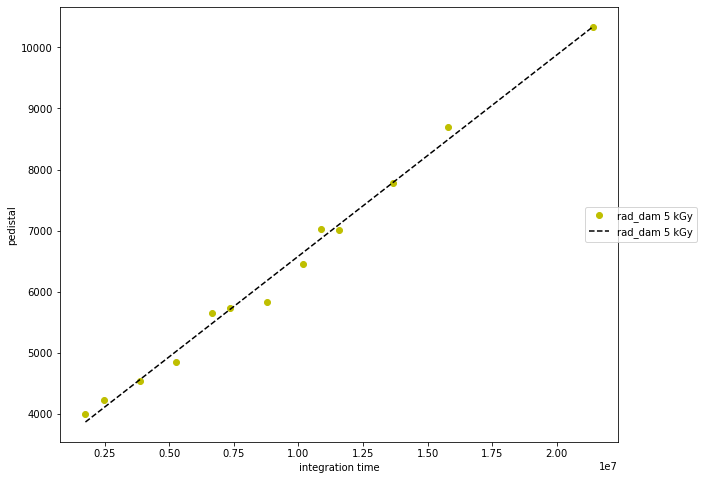

+0.00028


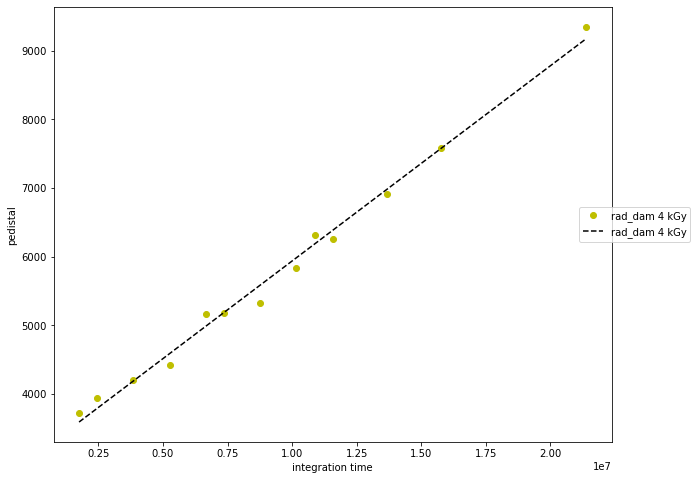

+0.00009


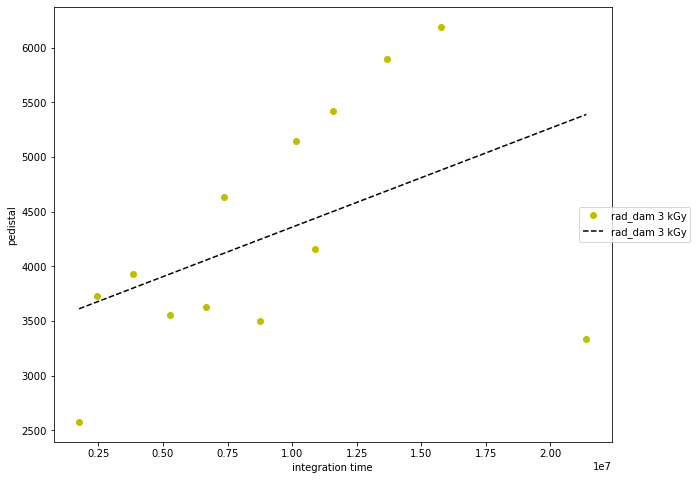

+0.00014


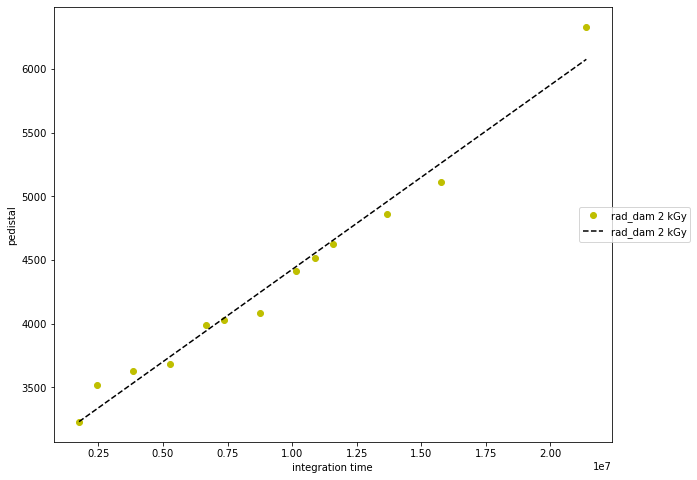

+0.00006


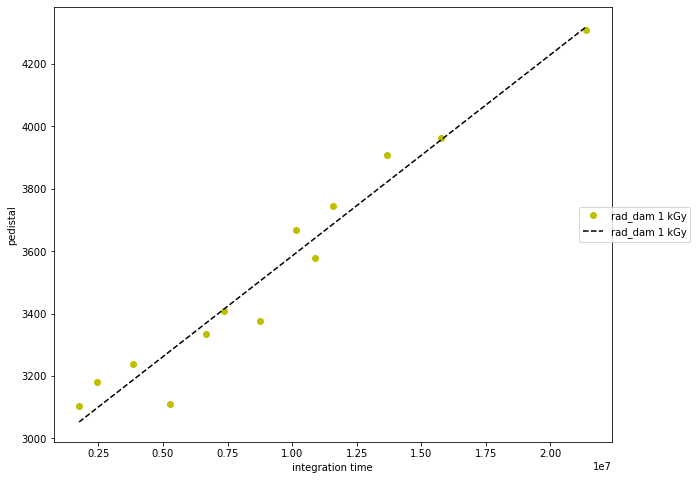

In [460]:
plot_separately(df4_9, rad_dam)

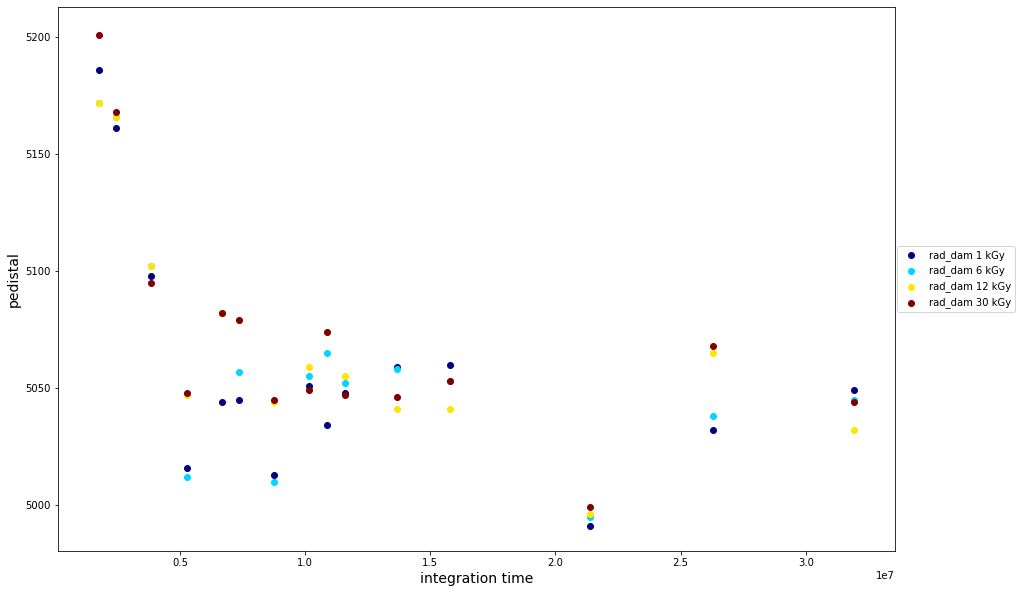

In [372]:
plot_alltogether(df, [1, 6, 12, 30])

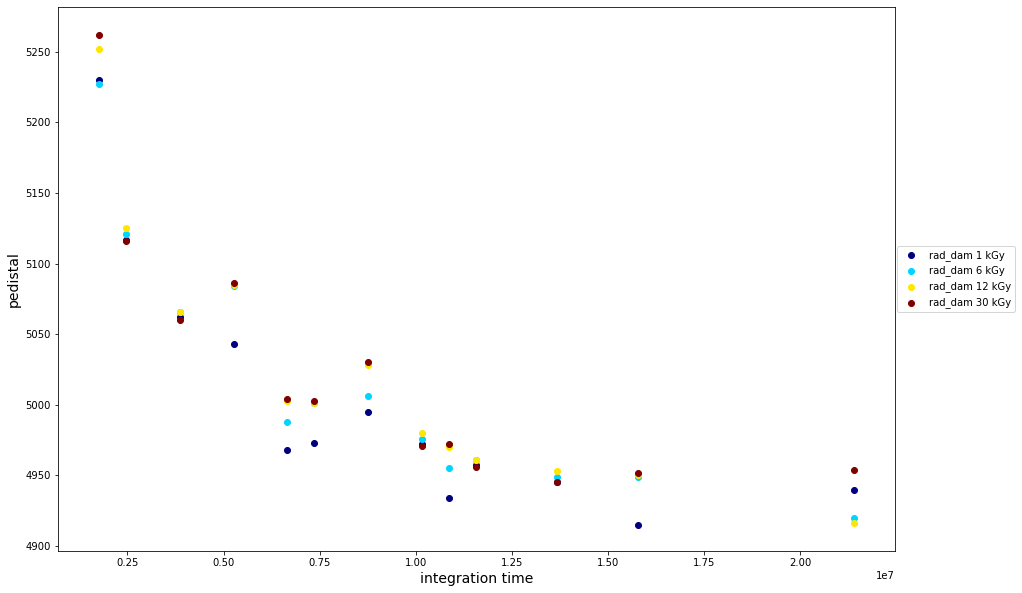

In [373]:
plot_alltogether(df4_9, [1, 6, 12, 30])

In [470]:
T10 = os.path.join(data_folder,'T10.0')


In [471]:
df10 = rad_dam_tint(T10)

AVG_Tint1753440.tif
AVG_Tint2454816.tif
AVG_Tint3156192.tif
AVG_Tint3857568.tif
AVG_Tint4558944.tif
AVG_Tint5260320.tif
AVG_Tint6663072.tif
AVG_Tint7364448.tif
AVG_Tint8767200.tif
AVG_Tint9468576.tif
AVG_Tint10169952.tif
AVG_Tint10871328.tif
AVG_Tint11572704.tif
AVG_Tint13676832.tif


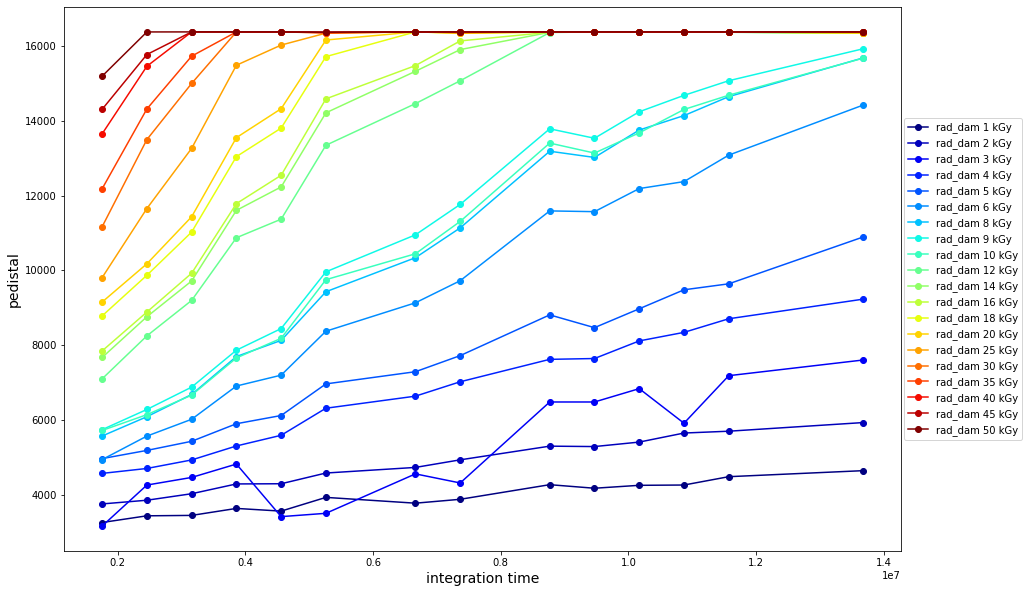

In [482]:
plot_alltogether(df10, rad_dam)

In [474]:
Tm5 = os.path.join(data_folder,'T-5.0')

dfm5 = rad_dam_tint(Tm5)




AVG_Tint1753440.tif
AVG_Tint3857568.tif
AVG_Tint5260320.tif
AVG_Tint8767200.tif
AVG_Tint10169952.tif
AVG_Tint11572704.tif
AVG_Tint13676832.tif
AVG_Tint15780960.tif
AVG_Tint21391968.tif
AVG_Tint26301600.tif
AVG_Tint31912608.tif


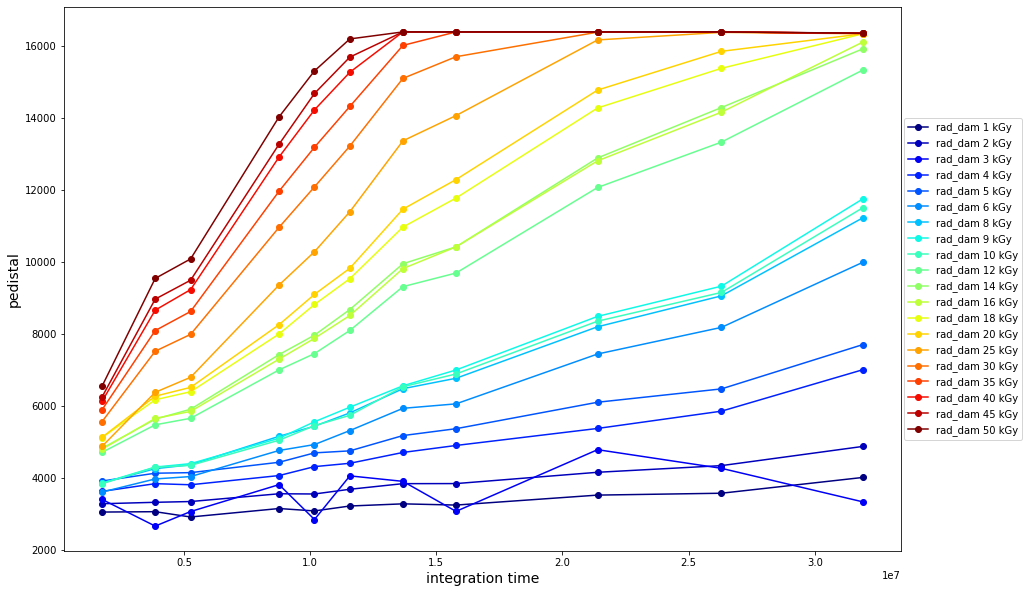

In [483]:
plot_alltogether(dfm5, rad_dam)

200 120 1 3705
200 1120 2 3618
200 2270 3 4267
1200 120 4 3809
1200 1120 5 3598
1200 2270 6 3467
1950 120 7 3284
1950 1120 8 3036
1950 2270 9 2863


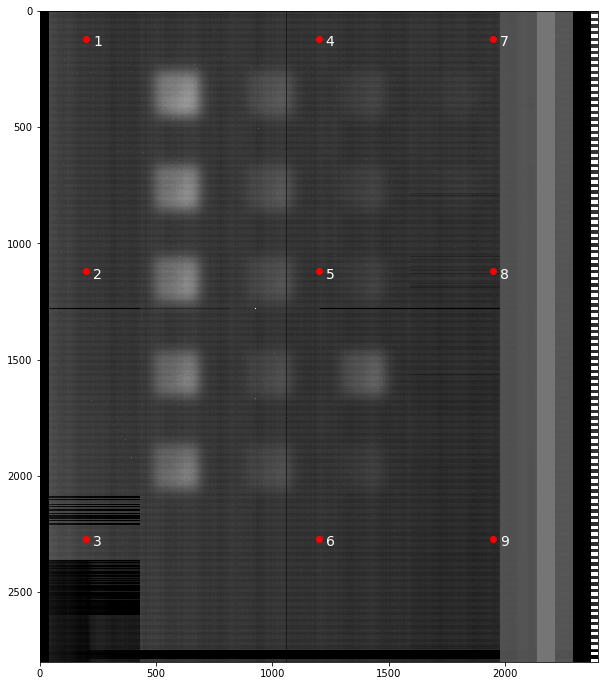

In [51]:
a0=200
a1=1000
a_shift = 750

a = [a0+ alpha*a1 + beta * a_shift for alpha,beta in zip([0,1,1], [0,0,1])]

b0=120
b1=1000
b_shift = 1150
b = [b0+alpha*b1+beta*b_shift for alpha,beta in zip([0,1,1], [0,0,1])]

rad_dam = [1, 2, 3, 4, 5, 6, 7, 8,9]

iter_rad_dam = iter(rad_dam)

plt.figure(figsize=(10,15))
plt.imshow(im, cmap='gray')
#plt.xlim(0,2400)
#plt.ylim(0, 2800)
iter_rad_dam = iter(rad_dam)
for xa in a:
    for xb in b:
        label=next(iter_rad_dam)

        plt.scatter(xa, xb, c='red')
        plt.text(xa+30, xb+30,label , color='w', size=14)
        print(xa, xb, label, im[xb, xa])
